Train on 318267 samples, validate on 136401 samples
Epoch 1/10
318267/318267 [==============================] - 11s - loss: 0.3293 - acc: 0.9796 - val_loss: 0.3114 - val_acc: 0.9807
Epoch 2/10
318267/318267 [==============================] - 10s - loss: 0.3293 - acc: 0.9796 - val_loss: 0.3114 - val_acc: 0.9807
Epoch 3/10
318267/318267 [==============================] - 10s - loss: 0.3293 - acc: 0.9796 - val_loss: 0.3114 - val_acc: 0.9807
Epoch 4/10
318267/318267 [==============================] - 10s - loss: 0.3293 - acc: 0.9796 - val_loss: 0.3114 - val_acc: 0.9807
Epoch 5/10
318267/318267 [==============================] - 11s - loss: 0.3293 - acc: 0.9796 - val_loss: 0.3114 - val_acc: 0.9807
Epoch 6/10
318267/318267 [==============================] - 11s - loss: 0.3293 - acc: 0.9796 - val_loss: 0.3114 - val_acc: 0.9807
Epoch 7/10
318267/318267 [==============================] - 10s - loss: 0.3293 - acc: 0.9796 - val_loss: 0.3114 - val_acc: 0.9807
Epoch 8/10
318267/318267 [============

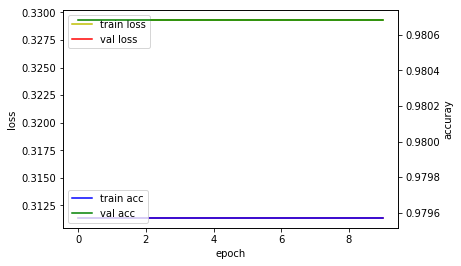

67008/69009 [============================>.] - ETA: 0sacc: 99.77%


In [16]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# 랜덤시드 고정시키기
np.random.seed(5)

# 1. 데이터 준비하기
train_dataset = np.loadtxt("training.txt", delimiter=" ")
test_dataset = np.loadtxt("test.txt", delimiter=" ")

# 2. 데이터셋 생성하기
x_train = train_dataset[:318267,0:6]
y_train = train_dataset[:318267,6]
x_val = train_dataset[318267:,0:6]
y_val = train_dataset[318267:,6]
x_test = test_dataset[:,0:6]
y_test = test_dataset[:,6]

# 3. 모델 구성하기
model = Sequential()
model.add(Dense(12, input_dim=6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 4. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))